In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1


In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def f_pred(X, w):
    return sigmoid(X.dot(w))

def loss_logreg(y_pred,y, w, lda): 
    n = len(y)
    reg_term = (lda/2) * np.sum(w**2) 
    loss = np.mean((-y.T).dot(np.log(y_pred)) - (1 - y).T.dot(np.log(1 - y_pred + 1e-5)))
    return loss + reg_term

def grad_loss(y_pred, y, X, w, lda):
    n = len(y)
    reg_term = lda * w
    grad = X.T.dot(y_pred - y) * 2 / n
    return grad + reg_term

# gradient descent function definition
def grad_desc(X, y , w_init, tau, max_iter, lda):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X, w) # linear predicition function   
        grad_f =  grad_loss(y_pred, y, X, w, lda) # gradient of the loss  
        w =  w - (tau * grad_f) # update rule of gradient descent  
        L_iters[i] = loss_logreg(y_pred, y, w, lda) # save the current loss value 
        
    return w, L_iters

In [ ]:
w_init = np.random.rand(100, 1).reshape(100,1)
tau = 1e-5
max_iter = 10000



1. Plot the training data

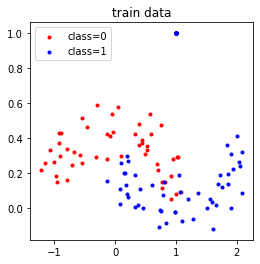

In [3]:
plt.figure(1, figsize = (4, 4))
plt.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], c = 'red', marker = '.', label = 'class=0')
plt.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], c = 'blue', marker = '.', label = 'class=1')
plt.title('train data')
plt.legend()
plt.show()

2. Plot the testing data

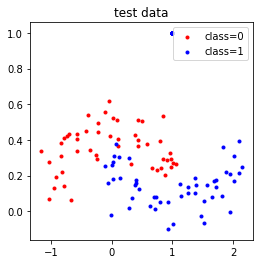

In [5]:
plt.figure(1, figsize = (4, 4))
plt.scatter(x1_test[idx_class0_test], x2_test[idx_class0_test], c = 'red', marker = '.', label = 'class=0')
plt.scatter(x1_test[idx_class1_test], x2_test[idx_class1_test], c = 'blue', marker = '.', label = 'class=1')
plt.title('test data')
plt.legend()
plt.show()